In [10]:
import pandas as pd 

df = pd.read_csv('ml ex/csv/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


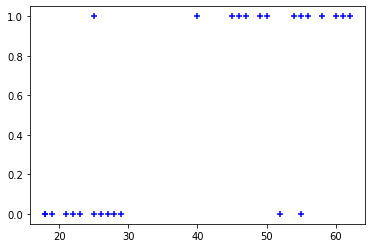

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df.age,df.bought_insurance,color="blue",marker="+")

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance, train_size=0.9)
X_test

,age
23,45
26,23
3,52


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
model.predict(X_test)

array([1, 0, 1])

In [38]:
model.predict_proba(X_test)

array([[0.2233556 , 0.7766444 ],
       [0.89762088, 0.10237912],
       [0.08838346, 0.91161654]])

In [39]:
# ___________________________________________________ HOMEWORK


In [59]:
df = pd.read_csv('ml ex/csv/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [60]:
left = df[df.left == 1]

In [61]:
not_left = df[df.left == 0]

In [62]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

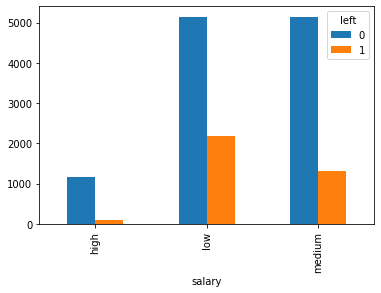

In [63]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [64]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [66]:
g = pd.get_dummies(df.salary)
x = pd.concat([subdf,g], axis='columns')
X = x.drop("salary",axis='columns')
y = df.left

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, train_size=0.8)

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
X_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
11908,0.67,207,0,0,0,1
10508,0.51,245,0,0,0,1
9193,0.66,136,0,0,1,0
13087,0.53,275,0,0,1,0
506,0.83,259,0,0,0,1


In [71]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])